<h2>
   Loading the necessary dependencies
</h2>
<p>We will start by importing all the necessary modules to carry out the practical work which is to build a linear regression model</p>
<ul>
    <li>
        <span style='font-weight: bolder'>torch</span> : PyTorch is a Python package that provides two high-level features
        <ul>
            <li>Tensor computation</li>
            <li>Deep neural networks built on a tape-based autograd system</li>
        </ul>
    </li>
    <li>
          <span style='font-weight: bolder'>nn</span> : The basic building block that will allow us to build our linear regression model 
    </li>
    <li>
        <span style='font-weight: bolder'>numpy</span> : allows us to perform numerical calculations with Python. It introduces an easier management of multi-dimensional arrays.
    </li>
    <li>
        <span style='font-weight: bolder'>make_regression</span> : Generate a random regression problem.
        <ul>
            <li>n_samples: The number of samples</li>
            <li>n_features: The number of features</li>
            <li>noise: The gaussian's noise standard deviation applied to the output</li>
        </ul>
    </li>
    <li>
       <span style='font-weight: bolder'>pyplot</span> : Framework that allows us to visualize our data and our model 
    </li>
</ul>

In [1]:
import torch
from torch import nn
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

<h2>Creation of the dataset </h2>
<p>
    In this sub-section we will create our training dataset using the make_regression function to generate a number of random doonees 
</p>

In [2]:
x_train, y_train = make_regression(n_samples= 100, n_features=1, shuffle= True, random_state=1, noise= 20) 

In [3]:
# Display the size of our data set 
print(x_train.shape)
print(y_train.shape)

(100, 1)
(100,)


In [4]:
# transform our data set from ndarrays to torch.tensor format
X = torch.from_numpy(x_train.astype(np.float32))
y = torch.from_numpy(y_train.astype(np.float32))

In [5]:
# reshaping our labels to be a shape (n_sample, 1)
y = y.view(y.shape[0], 1)
print(y.shape)

torch.Size([100, 1])


<h2>Building our linear Regression Model</h2>
<p>
    
</p>

In [6]:
class LinearRegression(nn.Module):# We define our linear regression by subclassing nn.Module 
    
    def __init__(self):
        
        super(LinearRegression, self).__init__()
        
        self.linearReg = nn.Sequential(
            nn.Linear(1, 1)
        )
        
    def forward(self, x):
        return self.linearReg(x)

<h2>Model Training Stage</h2>
<p>
    the training phase of the model is divided into three phases:
    <ul>
        <li>1<sup>st</sup> step :</li> feed-forword the data and calculate the error at the output between predictions and targets 
        <li>2<sup>nd</sup> step :</li> Perform a repropagation of the errors from the output to the input, this process is known as backpropagation. For more information please watch the video of <a href='https://www.youtube.com/watch?v=tIeHLnjs5U8' style='color: red'>3Blue1Brown</a> on youtube
        <li>3<sup>rd</sup> step :</li> updating model trainable parameters 
    </ul>
</p>

In [7]:
def train_loop(model, X, y, loss_fn, optimizer):
    
    for epoch in range(n_epoch):
     # Compute prediction and loss
        pred = model(X) #prediction computation
        
        loss = loss_fn(pred, y)#loss computation

        # Backpropagation
        loss.backward()
        
        # updating weights
        optimizer.step()
        optimizer.zero_grad()
        
        #print loss during training stage
        if (epoch+1) % 10 == 0:
            loss = loss.item()
            print(f"epoch: {(epoch+1)},  loss = [{loss:.4f}]")

In [8]:
model = LinearRegression()

learning_rate = 0.01
n_epoch = 200 

loss_fn = nn.MSELoss() # function to be minimize by our backpropagation phase
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) # Optimization algorithm used to minimize our loss function

train_loop(model, X, y, loss_fn, optimizer) # model training stage

epoch: 10,  loss = [4285.3545]
epoch: 20,  loss = [3201.0493]
epoch: 30,  loss = [2415.9443]
epoch: 40,  loss = [1846.9017]
epoch: 50,  loss = [1434.0736]
epoch: 60,  loss = [1134.3157]
epoch: 70,  loss = [916.4847]
epoch: 80,  loss = [758.0726]
epoch: 90,  loss = [642.7936]
epoch: 100,  loss = [558.8510]
epoch: 110,  loss = [497.6918]
epoch: 120,  loss = [453.1094]
epoch: 130,  loss = [420.5948]
epoch: 140,  loss = [396.8713]
epoch: 150,  loss = [379.5551]
epoch: 160,  loss = [366.9111]
epoch: 170,  loss = [357.6756]
epoch: 180,  loss = [350.9276]
epoch: 190,  loss = [345.9958]
epoch: 200,  loss = [342.3906]


In [9]:
X_test = torch.tensor([5]).view(1,1).numpy()
X_test = torch.from_numpy(X_test.astype(np.float32))
print(X_test.dtype)

torch.float32


<h2>Test of our linear regression model</h2>

In [10]:
predictions = model(X).detach()# detach() used to create a new Tensor, detached from the current graph

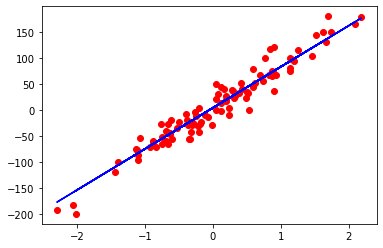

In [11]:
plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, predictions, 'b')
plt.show() 